# Introduction to SQL

In [1]:
import pandas as pd
import sqlalchemy

Create a Database Engine
An engine is a tool that can communicate with our database. Think of it as a smart connection that knows the dialect, or type, of database that we have and how to connect and interact with it.

First, we need to define a connection string to connect to our database. The connection string tells the engine the type of database that we’re using and other important connection details, like a password, server name, port number, or IP address.



In [2]:
# Create a temporary sqlite database
database_connection_string = 'sqlite:///'
engine = sqlalchemy.create_engine(database_connection_string)
engine

Engine(sqlite:///)

In [3]:
engine.table_names()

<ipython-input-3-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


[]

In [4]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2], 'GOOG': [3, 4]})
stocks_dataframe

,AAPL,GOOG
0,1,3
1,2,4


In [5]:
stocks_dataframe.to_sql('stocks', engine,  index=False, if_exists='replace')



2

In [6]:
engine.table_names()

<ipython-input-6-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

Do you wonder where the database is and how to get data from it? Currently, your SQLite database resides in your computer’s memory—but only temporarily. As soon as you close your Jupyter notebook, the database will disappear. If you want to save the database to access it in the future, you can specify a file name, such as sqlite:///mydatabase.db. This will save the database information to a file named mydatabase.db, which will reside on your computer's hard drive. But for now, it’s easier to use the temporary in-memory database, sqlite:///.

In [7]:
sql_stocks_df = pd.read_sql_table('stocks', con=engine)
sql_stocks_df

,AAPL,GOOG
0,1,3
1,2,4


In [8]:
database_connection_string = 'sqlite:///'
# Create the database engine
engine = sqlalchemy.create_engine(
    database_connection_string,
    echo=True
)

In [9]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')

2022-05-05 09:21:37,870 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stocks")
2022-05-05 09:21:37,871 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,872 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("stocks")
2022-05-05 09:21:37,873 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,875 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-05 09:21:37,876 INFO sqlalchemy.engine.Engine 
CREATE TABLE stocks (
	"AAPL" BIGINT, 
	"GOOG" BIGINT
)


2022-05-05 09:21:37,876 INFO sqlalchemy.engine.Engine [no key 0.00087s] ()
2022-05-05 09:21:37,878 INFO sqlalchemy.engine.Engine COMMIT
2022-05-05 09:21:37,879 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-05 09:21:37,880 INFO sqlalchemy.engine.Engine INSERT INTO stocks ("AAPL", "GOOG") VALUES (?, ?)
2022-05-05 09:21:37,881 INFO sqlalchemy.engine.Engine [generated in 0.00089s] ((1, 3), (2, 4))
2022-05-05 09:21:37,881 INFO sqlalchemy.engine.Engine COMMIT


2

In [10]:
#Create a Table via a Raw SQL Statement
create_table = """
CREATE TABLE stocks (
    "AAPL" BIGINT,
    "GOOG" BIGINT
)
"""
create_table

'\nCREATE TABLE stocks (\n    "AAPL" BIGINT,\n    "GOOG" BIGINT\n)\n'

In [11]:
create_table = """
CREATE TABLE delicious_stocks (
    "EAT" BIGINT,
    "CAKE" BIGINT
)
"""

In [12]:
engine.execute(create_table)

2022-05-05 09:21:37,933 INFO sqlalchemy.engine.Engine 
CREATE TABLE delicious_stocks (
    "EAT" BIGINT,
    "CAKE" BIGINT
)

2022-05-05 09:21:37,934 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,935 INFO sqlalchemy.engine.Engine COMMIT


In [13]:
engine.table_names()

2022-05-05 09:21:37,948 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-05 09:21:37,949 INFO sqlalchemy.engine.Engine [raw sql] ()


<ipython-input-13-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['delicious_stocks', 'stocks']

In [14]:
pd.read_sql_table('delicious_stocks', con=engine)

2022-05-05 09:21:37,964 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("delicious_stocks")
2022-05-05 09:21:37,965 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,967 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("delicious_stocks")
2022-05-05 09:21:37,967 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,969 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-05 09:21:37,971 INFO sqlalchemy.engine.Engine [raw sql] ('delicious_stocks',)
2022-05-05 09:21:37,972 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("delicious_stocks")
2022-05-05 09:21:37,973 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,974 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("delicious_stocks")
2022-05-05 09:21:37,974 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:37,975 INFO sqlalchemy.engine.Engine SELECT sql 

,EAT,CAKE


In [15]:
insert_data = """
INSERT INTO delicious_stocks ("EAT", "CAKE") VALUES (?, ?)
"""

In [16]:
engine.execute(insert_data, ((10, 30), (20, 40)))

2022-05-05 09:21:38,025 INFO sqlalchemy.engine.Engine 
INSERT INTO delicious_stocks ("EAT", "CAKE") VALUES (?, ?)

2022-05-05 09:21:38,027 INFO sqlalchemy.engine.Engine [raw sql] ((10, 30), (20, 40))
2022-05-05 09:21:38,028 INFO sqlalchemy.engine.Engine COMMIT


In [17]:
pd.read_sql_table('delicious_stocks', con=engine)

2022-05-05 09:21:38,042 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("delicious_stocks")
2022-05-05 09:21:38,043 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,044 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("delicious_stocks")
2022-05-05 09:21:38,045 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,046 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-05 09:21:38,047 INFO sqlalchemy.engine.Engine [raw sql] ('delicious_stocks',)
2022-05-05 09:21:38,048 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("delicious_stocks")
2022-05-05 09:21:38,048 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,049 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("delicious_stocks")
2022-05-05 09:21:38,050 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,050 INFO sqlalchemy.engine.Engine SELECT sql 

,EAT,CAKE
0,10,30
1,20,40


In [18]:
# Read data from the sqlalchemy table
read_all_data = """
SELECT "EAT", "CAKE" FROM delicious_stocks
"""
engine.execute(read_all_data)

2022-05-05 09:21:38,073 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 09:21:38,074 INFO sqlalchemy.engine.Engine [raw sql] ()


In [19]:
results = engine.execute(read_all_data)
for row in results:
    print(row)

2022-05-05 09:21:38,089 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 09:21:38,090 INFO sqlalchemy.engine.Engine [raw sql] ()
(10, 30)
(20, 40)


In [20]:
results = engine.execute(read_all_data)
list(results)

2022-05-05 09:21:38,106 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 09:21:38,106 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 40)]

In [21]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 09:21:38,122 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 09:21:38,123 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 40)]

In [22]:
# Update data

update_cake = """
UPDATE delicious_stocks
SET CAKE = 100
WHERE CAKE = 40
"""
engine.execute(update_cake)

2022-05-05 09:21:38,138 INFO sqlalchemy.engine.Engine 
UPDATE delicious_stocks
SET CAKE = 100
WHERE CAKE = 40

2022-05-05 09:21:38,139 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,140 INFO sqlalchemy.engine.Engine COMMIT


In [23]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 09:21:38,154 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 09:21:38,155 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 100)]

In [24]:
# Delete information 
delete_eat = """
DELETE FROM delicious_stocks
WHERE EAT = 20
"""
engine.execute(delete_eat)

2022-05-05 09:21:38,170 INFO sqlalchemy.engine.Engine 
DELETE FROM delicious_stocks
WHERE EAT = 20

2022-05-05 09:21:38,170 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 09:21:38,171 INFO sqlalchemy.engine.Engine COMMIT


In [25]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 09:21:38,186 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 09:21:38,187 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30)]

# Designing Database Queries

In [26]:
import pandas as pd
import numpy as np
import sqlalchemy

# Create a temporary sqlite database
database_connection_string = 'sqlite:///'

# Create an engine to interact with the database
engine = sqlalchemy.create_engine(database_connection_string)

In [27]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2, 3], 'GOOG': [4, 5, 6]})
stocks_dataframe.to_sql('stocks', engine)
engine.table_names()

<ipython-input-27-5b966f38758c>:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

In [28]:
query = """
SELECT "AAPL" FROM stocks;
"""

results = engine.execute(query)
list(results)

[(1,), (2,), (3,)]

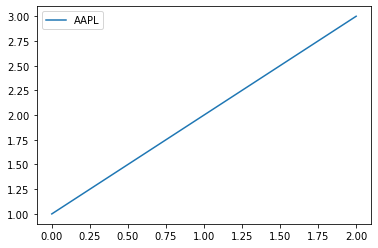

In [29]:
# Panda query parameter to data frame

df = pd.read_sql_query(query, con=engine)
df.plot()

In [30]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL < 3;
"""
apple_df = pd.read_sql_query(query, con=engine)
apple_df

,AAPL
0,1
1,2


In [31]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL = 1 OR AAPL = 3;
"""
df = pd.read_sql_query(query, con=engine)
df

,AAPL
0,1
1,3


In [32]:
# Set the random seed so we all get the same random data
np.random.seed(0)
stocks_dataframe = pd.DataFrame(
    np.random.randint(0, 100, size=(10, 2)),
    columns=["AAPL", "GOOG"]
)

# To view the data, use either the iloc function or the head function.
display(stocks_dataframe.iloc[:3])
display(stocks_dataframe.head(3))

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [33]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')
query = """
SELECT *
FROM stocks
LIMIT 3;
"""

limit_df = pd.read_sql_query(query, con=engine)
limit_df

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [34]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
LIMIT 3;
"""

where_limit_df = pd.read_sql_query(query, con=engine)
where_limit_df

,AAPL,GOOG
0,44,47
1,36,87
2,39,87


In [35]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
ORDER BY AAPL DESC
LIMIT 3;
"""

orderby_df = pd.read_sql_query(query, con=engine)
orderby_df

,AAPL,GOOG
0,46,88
1,44,47
2,39,87


# Selecting Data From multiple Tables

To accomplish this goal in SQL, we use joins via the JOIN clause. This clause offers four main types of joins: inner join, left join, right join, and full join (also referred to as a full outer join). Depending on our goal, we can use any of these types of joins, which represent different techniques for combining data from multiple tables, as follows:

Inner join: This selects the elements in every row that match in Table A and Table B.

Left join: This selects all the elements in Table A (regardless of whether they match the elements in Table B).

Right join: This selects all the elements in Table B (regardless of whether they match the elements in Table A).

Full join: This selects all the elements in Table A and in Table B (regardless of whether they match the elements in the other table).

In [36]:
from faker import Faker
import random

random.seed(2)
Faker.seed(2)
fake = Faker()
available_currencies = []
bank_data = []

for i in range(10):
    currency = fake.currency_name()
    available_currencies.append(currency)
    bank_data.append({
        "bank_id": fake.swift(),
        "bank_default_currency": currency
    })

bank_dataframe = pd.DataFrame(bank_data)
bank_dataframe

,bank_id,bank_default_currency
0,CLFXGBTQ,Bahraini dinar
1,TBSVGBK1,Central African CFA franc
2,ZXQLGB826RC,Zimbabwean dollar
3,OKMNGB7K9LP,Australian dollar
4,FKFEGB66,Hungarian forint
5,OZNXGB7X,Burmese kyat
6,LOFYGBZ37P5,Venezuelan bolívar
7,QQZLGB33W93,Japanese yen
8,KWFTGBR4,Sudanese pound
9,ZWQRGB760TN,Cayman Islands dollar


In [37]:
customer_data = []

for _ in range(100):
    customer_data.append({
        "first_name": fake.first_name(),
        "last_name": fake.last_name(),
        "address": fake.address(),
        "default_currency": random.choice(available_currencies),
        "bank_id": random.choice(bank_data)["bank_id"]
    })

customer_dataframe = pd.DataFrame(customer_data)
display(customer_dataframe.head(10))
display(customer_dataframe.tail(10))

,first_name,last_name,address,default_currency,bank_id
0,Tracy,Richardson,"0310 Joshua Forks\nPort Alexandraview, IL 08415",Bahraini dinar,TBSVGBK1
1,Rodney,Love,"2301 Stephanie Burg Apt. 054\nPort Sharon, HI ...",Central African CFA franc,OZNXGB7X
2,Heather,Cruz,"00591 Rogers Burgs\nShaneton, KS 99547",Zimbabwean dollar,FKFEGB66
3,Richard,Howell,"51072 Tucker Islands\nPort Susan, KS 79940",Hungarian forint,ZWQRGB760TN
4,Tara,Valdez,"040 Evan Court\nReidhaven, VT 04616",Australian dollar,ZWQRGB760TN
5,Virginia,Hall,"93995 Cohen Harbors Apt. 206\nMartinhaven, CO ...",Bahraini dinar,ZWQRGB760TN
6,Curtis,Smith,"08774 Lewis Trace\nLake Linda, NY 03295",Zimbabwean dollar,LOFYGBZ37P5
7,Bianca,Williams,"75081 Roberts Landing\nAndrewchester, CT 40598",Venezuelan bolívar,KWFTGBR4
8,James,Rowe,"67739 Adam Burg Suite 413\nLeeshire, MO 94338",Burmese kyat,KWFTGBR4
9,Steven,Molina,"1119 Davidson Forest\nNorth Christinefort, AZ ...",Japanese yen,KWFTGBR4


,first_name,last_name,address,default_currency,bank_id
90,Christina,Smith,"6697 Butler Avenue\nAnthonyburgh, SD 46269",Zimbabwean dollar,ZXQLGB826RC
91,Javier,Vaughan,"5015 White Shoals Apt. 447\nKellymouth, WV 77571",Zimbabwean dollar,TBSVGBK1
92,Rhonda,Marshall,"1821 Long Trafficway\nLake Robertmouth, KY 63813",Japanese yen,OKMNGB7K9LP
93,Andrew,Jimenez,"391 Gerald Springs Suite 040\nStricklandfurt, ...",Sudanese pound,CLFXGBTQ
94,Ryan,Hunter,"0424 James Flat Apt. 549\nPort Erika, MS 77399",Australian dollar,OKMNGB7K9LP
95,David,Williams,"4243 Oconnell Spring\nClaytonmouth, IL 59846",Japanese yen,TBSVGBK1
96,Stacey,Norris,"7493 Murray Roads Suite 437\nJohnsonhaven, ME ...",Hungarian forint,TBSVGBK1
97,Jeff,Gillespie,"12254 Diana Trace\nNorth Vincenthaven, MA 66856",Cayman Islands dollar,OKMNGB7K9LP
98,Katelyn,Dickerson,"777 Campbell Drive Suite 706\nWhitebury, MD 68670",Cayman Islands dollar,ZWQRGB760TN
99,Robert,Wallace,"PSC 5602, Box 5893\nAPO AP 76458",Burmese kyat,FKFEGB66


In [38]:
engine = sqlalchemy.create_engine(database_connection_string)
bank_dataframe.to_sql('banks', engine, index=False, if_exists='replace')
customer_dataframe.to_sql('customers', engine, index=False, if_exists='replace')
engine.table_names()

<ipython-input-38-58c020335d01>:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['banks', 'customers']

In [39]:
query = """
SELECT *
FROM banks
JOIN customers ON banks.bank_id = customers.bank_id;
"""
joined_df = pd.read_sql_query(query, con=engine)
display(joined_df.head(10))
display(joined_df.tail(10))

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,CLFXGBTQ,Bahraini dinar,Andre,Fowler,"76574 Brown Road\nLake Danny, CO 19208",Central African CFA franc,CLFXGBTQ
1,CLFXGBTQ,Bahraini dinar,Andrew,Jimenez,"391 Gerald Springs Suite 040\nStricklandfurt, ...",Sudanese pound,CLFXGBTQ
2,CLFXGBTQ,Bahraini dinar,Anthony,Hughes,"800 David Well Apt. 314\nDanielburgh, PA 40079",Central African CFA franc,CLFXGBTQ
3,CLFXGBTQ,Bahraini dinar,Barbara,Anderson,"550 Nancy Causeway\nWest Bryan, TX 64182",Zimbabwean dollar,CLFXGBTQ
4,CLFXGBTQ,Bahraini dinar,Briana,Dixon,5239 Megan Ridges Apt. 233\nNew Christopherbor...,Venezuelan bolívar,CLFXGBTQ
5,CLFXGBTQ,Bahraini dinar,Janice,Roberts,USNS Lindsey\nFPO AA 63966,Hungarian forint,CLFXGBTQ
6,CLFXGBTQ,Bahraini dinar,Jillian,Shelton,"8068 Hall Estates\nMoodyborough, IN 66285",Bahraini dinar,CLFXGBTQ
7,CLFXGBTQ,Bahraini dinar,Kevin,Greer,"4183 Allen Vista Suite 238\nEast Brenda, MO 35338",Australian dollar,CLFXGBTQ
8,CLFXGBTQ,Bahraini dinar,Kimberly,Gomez,"9064 Teresa Plaza\nCarrollview, NH 93840",Central African CFA franc,CLFXGBTQ
9,CLFXGBTQ,Bahraini dinar,Kyle,Butler,"6264 Rose Ports Suite 819\nWest Sarashire, VA ...",Cayman Islands dollar,CLFXGBTQ


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
90,ZWQRGB760TN,Cayman Islands dollar,Kirsten,Cantrell,"64714 Monique Lane\nNew Wanda, NM 58528",Sudanese pound,ZWQRGB760TN
91,ZWQRGB760TN,Cayman Islands dollar,Larry,Barker,Unit 2821 Box 7432\nDPO AA 92374,Burmese kyat,ZWQRGB760TN
92,ZWQRGB760TN,Cayman Islands dollar,Margaret,Nunez,"93615 Sarah Cliff\nEast Andrea, AL 91224",Burmese kyat,ZWQRGB760TN
93,ZWQRGB760TN,Cayman Islands dollar,Paula,Arnold,"96800 Lee Islands\nJessicaton, MA 24651",Burmese kyat,ZWQRGB760TN
94,ZWQRGB760TN,Cayman Islands dollar,Richard,Howell,"51072 Tucker Islands\nPort Susan, KS 79940",Hungarian forint,ZWQRGB760TN
95,ZWQRGB760TN,Cayman Islands dollar,Tammy,Garcia,"608 Young Village\nWeaverfort, FL 47663",Burmese kyat,ZWQRGB760TN
96,ZWQRGB760TN,Cayman Islands dollar,Tara,Keller,"798 Davis Streets Suite 795\nGabrielbury, SD 2...",Hungarian forint,ZWQRGB760TN
97,ZWQRGB760TN,Cayman Islands dollar,Tara,Valdez,"040 Evan Court\nReidhaven, VT 04616",Australian dollar,ZWQRGB760TN
98,ZWQRGB760TN,Cayman Islands dollar,Virginia,Hall,"93995 Cohen Harbors Apt. 206\nMartinhaven, CO ...",Bahraini dinar,ZWQRGB760TN
99,ZWQRGB760TN,Cayman Islands dollar,William,Meyer,"734 Anthony Canyon\nLake Donald, IA 70977",Sudanese pound,ZWQRGB760TN


In [40]:
query = """
SELECT *
FROM banks
LEFT JOIN customers ON banks.bank_id = customers.bank_id;
"""

left_join_df = pd.read_sql_query(query, con=engine)
display(left_join_df.head(10))
display(left_join_df.tail(10))

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,CLFXGBTQ,Bahraini dinar,Andre,Fowler,"76574 Brown Road\nLake Danny, CO 19208",Central African CFA franc,CLFXGBTQ
1,CLFXGBTQ,Bahraini dinar,Andrew,Jimenez,"391 Gerald Springs Suite 040\nStricklandfurt, ...",Sudanese pound,CLFXGBTQ
2,CLFXGBTQ,Bahraini dinar,Anthony,Hughes,"800 David Well Apt. 314\nDanielburgh, PA 40079",Central African CFA franc,CLFXGBTQ
3,CLFXGBTQ,Bahraini dinar,Barbara,Anderson,"550 Nancy Causeway\nWest Bryan, TX 64182",Zimbabwean dollar,CLFXGBTQ
4,CLFXGBTQ,Bahraini dinar,Briana,Dixon,5239 Megan Ridges Apt. 233\nNew Christopherbor...,Venezuelan bolívar,CLFXGBTQ
5,CLFXGBTQ,Bahraini dinar,Janice,Roberts,USNS Lindsey\nFPO AA 63966,Hungarian forint,CLFXGBTQ
6,CLFXGBTQ,Bahraini dinar,Jillian,Shelton,"8068 Hall Estates\nMoodyborough, IN 66285",Bahraini dinar,CLFXGBTQ
7,CLFXGBTQ,Bahraini dinar,Kevin,Greer,"4183 Allen Vista Suite 238\nEast Brenda, MO 35338",Australian dollar,CLFXGBTQ
8,CLFXGBTQ,Bahraini dinar,Kimberly,Gomez,"9064 Teresa Plaza\nCarrollview, NH 93840",Central African CFA franc,CLFXGBTQ
9,CLFXGBTQ,Bahraini dinar,Kyle,Butler,"6264 Rose Ports Suite 819\nWest Sarashire, VA ...",Cayman Islands dollar,CLFXGBTQ


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
90,ZWQRGB760TN,Cayman Islands dollar,Kirsten,Cantrell,"64714 Monique Lane\nNew Wanda, NM 58528",Sudanese pound,ZWQRGB760TN
91,ZWQRGB760TN,Cayman Islands dollar,Larry,Barker,Unit 2821 Box 7432\nDPO AA 92374,Burmese kyat,ZWQRGB760TN
92,ZWQRGB760TN,Cayman Islands dollar,Margaret,Nunez,"93615 Sarah Cliff\nEast Andrea, AL 91224",Burmese kyat,ZWQRGB760TN
93,ZWQRGB760TN,Cayman Islands dollar,Paula,Arnold,"96800 Lee Islands\nJessicaton, MA 24651",Burmese kyat,ZWQRGB760TN
94,ZWQRGB760TN,Cayman Islands dollar,Richard,Howell,"51072 Tucker Islands\nPort Susan, KS 79940",Hungarian forint,ZWQRGB760TN
95,ZWQRGB760TN,Cayman Islands dollar,Tammy,Garcia,"608 Young Village\nWeaverfort, FL 47663",Burmese kyat,ZWQRGB760TN
96,ZWQRGB760TN,Cayman Islands dollar,Tara,Keller,"798 Davis Streets Suite 795\nGabrielbury, SD 2...",Hungarian forint,ZWQRGB760TN
97,ZWQRGB760TN,Cayman Islands dollar,Tara,Valdez,"040 Evan Court\nReidhaven, VT 04616",Australian dollar,ZWQRGB760TN
98,ZWQRGB760TN,Cayman Islands dollar,Virginia,Hall,"93995 Cohen Harbors Apt. 206\nMartinhaven, CO ...",Bahraini dinar,ZWQRGB760TN
99,ZWQRGB760TN,Cayman Islands dollar,William,Meyer,"734 Anthony Canyon\nLake Donald, IA 70977",Sudanese pound,ZWQRGB760TN


In [41]:
query = """
SELECT *
FROM banks
JOIN customers ON banks.bank_id = customers.bank_id
WHERE banks.bank_default_currency = customers.default_currency;
"""

join_where_df = pd.read_sql_query(query, con=engine)
display(join_where_df.head())
display(join_where_df.tail())

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,CLFXGBTQ,Bahraini dinar,Jillian,Shelton,"8068 Hall Estates\nMoodyborough, IN 66285",Bahraini dinar,CLFXGBTQ
1,CLFXGBTQ,Bahraini dinar,Michael,Singleton,"821 Ashley Tunnel Apt. 512\nClarkton, MA 56756",Bahraini dinar,CLFXGBTQ
2,TBSVGBK1,Central African CFA franc,William,Morse,Unit 9252 Box 6348\nDPO AE 99107,Central African CFA franc,TBSVGBK1
3,ZXQLGB826RC,Zimbabwean dollar,Christina,Smith,"6697 Butler Avenue\nAnthonyburgh, SD 46269",Zimbabwean dollar,ZXQLGB826RC
4,ZXQLGB826RC,Zimbabwean dollar,Christopher,Flowers,"91852 John Motorway\nBryantmouth, AR 45639",Zimbabwean dollar,ZXQLGB826RC


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
9,LOFYGBZ37P5,Venezuelan bolívar,Nicole,Rivera,"28615 Jennifer Glens Apt. 273\nBaxterstad, WV ...",Venezuelan bolívar,LOFYGBZ37P5
10,QQZLGB33W93,Japanese yen,Joseph,Rose,"62810 Jason Lock Apt. 204\nFernandezbury, FL 7...",Japanese yen,QQZLGB33W93
11,KWFTGBR4,Sudanese pound,Bryan,Rodriguez,"3551 Ellis Expressway Suite 747\nLake Scott, I...",Sudanese pound,KWFTGBR4
12,KWFTGBR4,Sudanese pound,Thomas,James,"88198 Brian Station\nMoraleshaven, CT 48270",Sudanese pound,KWFTGBR4
13,ZWQRGB760TN,Cayman Islands dollar,Katelyn,Dickerson,"777 Campbell Drive Suite 706\nWhitebury, MD 68670",Cayman Islands dollar,ZWQRGB760TN
